#### Importing necessary libraries

In [23]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt

In [24]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV 


from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

import pickle

In [64]:
#Import the training dataset
df=pd.read_csv('diabetes_dataset')
pd.set_option('display.max_columns', None)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1,39.0,0,0,0,1,1,1,0,1,0,3,0,0,0,1,10,5,7
1,1,1,0,1,38.0,1,0,0,1,1,0,0,1,0,5,5,30,1,0,9,5,1
2,0,0,0,1,29.0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,5,2,3
3,0,0,0,1,19.0,0,0,0,1,1,1,0,1,0,3,0,0,0,0,7,6,8
4,1,1,1,1,40.0,1,0,0,0,0,0,0,0,1,4,10,5,0,0,4,5,5


In [6]:
df.shape

(5000, 22)

In [103]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.isnull().sum()  #checking if there are null values

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
df.dtypes  #check datatype of features

Diabetes_binary           int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object

In [8]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.491800,0.550400,0.525000,0.974200,29.775200,0.472200,0.05980,0.14180,0.703400,0.621400,0.783800,0.038400,0.95300,0.086400,2.803600,3.651800,5.529600,0.244400,0.460000,8.506000,4.936400,5.707000
std,0.499983,0.497503,0.499425,0.158554,7.152936,0.499276,0.23714,0.34888,0.456804,0.485087,0.411693,0.192179,0.21166,0.280982,1.110889,8.073859,9.782385,0.429774,0.498447,2.883336,1.021843,2.196296
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.00000,0.00000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.00000,0.00000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,4.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,92.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


#### All the features range are different-->Standardisation required


In [7]:
a=ProfileReport(df)
a.to_widgets()

#### According to Cramers Correlation matrix,there is no high correlation between the features

In [7]:
df_s.reset_index(inplace=True)
df_s.drop('index',axis=1,inplace=True)
df_s.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,5.0,7.0
1,1.0,1.0,0.0,1.0,38.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,5.0,30.0,1.0,0.0,9.0,5.0,1.0
2,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0
3,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
4,1.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,10.0,5.0,0.0,0.0,4.0,5.0,5.0


In [11]:
#Checking the unique values of each column
for i in df.columns:
    print(i,df[i].unique())

Diabetes_binary [1 0]
HighBP [1 0]
HighChol [1 0]
CholCheck [1 0]
BMI [39. 38. 29. 19. 40. 25. 27. 34. 24. 36. 23. 41. 33. 28. 31. 22. 53. 26.
 30. 32. 35. 57. 20. 21. 42. 46. 47. 18. 43. 37. 63. 60. 44. 45. 15. 17.
 81. 49. 16. 14. 54. 48. 50. 73. 76. 92. 84. 67. 52. 66. 55. 70. 77. 56.
 51. 68. 69. 64. 72. 59. 61. 82.]
Smoker [0 1]
Stroke [0 1]
HeartDiseaseorAttack [0 1]
PhysActivity [1 0]
Fruits [1 0]
Veggies [1 0]
HvyAlcoholConsump [0 1]
AnyHealthcare [1 0]
NoDocbcCost [0 1]
GenHlth [3 5 1 4 2]
MentHlth [ 0  5 10 30  1  2  6  3 15 20  8  7  4 21 12 25 14 23 29 28  9 26 18 16
 22]
PhysHlth [ 0 30  5 15  1  2 14 17 29  7 20  4  3 10  6 25 21 27 16 28 26  9 12  8
 13 23 18 22 11]
DiffWalk [0 1]
Sex [1 0]
Age [10  9  5  7  4  8 11 12  3  1  6 13  2]
Education [5 2 6 4 3 1]
Income [7 1 3 8 5 6 4 2]


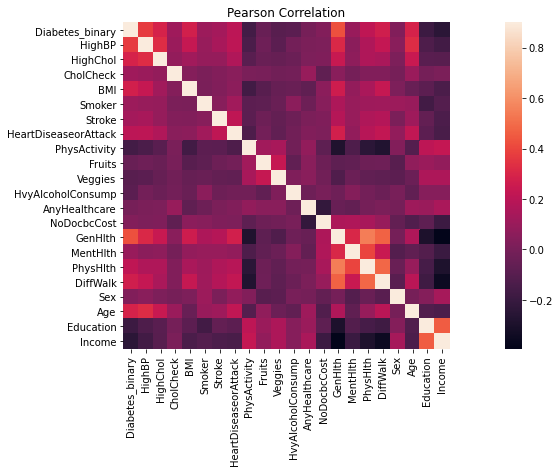

In [14]:
import seaborn as sns
plt.figure(figsize = (20,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [18]:
import statsmodels.formula.api as smf
lrs = smf.ols(formula='Diabetes_binary~HighBP+HighChol+CholCheck+ BMI+Smoker+Stroke+ HeartDiseaseorAttack+PhysActivity+ Fruits+ Veggies+HvyAlcoholConsump+AnyHealthcare+NoDocbcCost+GenHlth+MentHlth+PhysHlth+DiffWalk+Sex+Age+Education+Income',data=df).fit()
lrs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Diabetes_binary   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     112.2
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:20:18   Log-Likelihood:                -2659.5
No. Observations:                5000   AIC:                             5363.
Df Residuals:                    4978   BIC:                             5506.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5856      0.066     -8.913      0.000      -0.714      -0.457
HighBP                   0.1428      0.014     10.465      0.000       0.116       0.170
HighChol                 0.1063      0.013      8.344      0.000       0.081       0.131
CholCheck                0.1781      0.037      4.758      0.000       0.105       0.251
BMI                      0.0109      0.001     12.251      0.000       0.009       0.013
Smoker                   0.0164      0.012      1.346      0.179      -0.007       0.040
Stroke                   0.0435      0.026      1.692      0.091      -0.007       0.094
HeartDiseaseorAttack     0.0367      0.018      2.014      0.044       0.001       0.072
PhysActivity             0.0015      0.014      0.108      0.914      -0.026       0.029
Fruits                  -0.0075      0.013     -0.589      0.556      -0.032       0.017
Veggies                 -0.0185      0.015     -1.235      0.217      -0.048       0.011
HvyAlcoholConsump       -0.1426      0.031     -4.638      0.000      -0.203      -0.082
AnyHealthcare            0.0129      0.029      0.445      0.656      -0.044       0.070
NoDocbcCost             -0.0135      0.022     -0.613      0.540      -0.057       0.030
GenHlth                  0.1196      0.007     16.549      0.000       0.105       0.134
MentHlth                 0.0002      0.001      0.191      0.849      -0.001       0.002
PhysHlth                -0.0025      0.001     -3.206      0.001      -0.004      -0.001
DiffWalk                 0.0191      0.017      1.118      0.263      -0.014       0.053
Sex                      0.0188      0.012      1.533      0.125      -0.005       0.043
Age                      0.0269      0.002     11.585      0.000       0.022       0.031
Education               -0.0108      0.007     -1.621      0.105      -0.024       0.002
Income                  -0.0120      0.003     -3.637      0.000      -0.019      -0.006
==============================================================================
Omnibus:                      487.827   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.616
Skew:                          -0.144   Prob(JB):                     3.61e-35
Kurtosis:                       2.177   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Necessary Classes for training and prediction

In [98]:
class preprocessing:
    
    """
    This class is used for preprocessing.
    """
    
    def __init__(self,data):
        self.data=data
        self.stand=StandardScaler()
    
    def train_scale(self):
        """
        Takes the dataframe and performs standardisation on input data.
        """

        X=self.data.drop('Diabetes_binary',axis=1)
        Y=self.data['Diabetes_binary']                   #Seperate input and output dataset

        df_scaled=self.stand.fit_transform(X)     #Scale the input dataset.


        df_new=pd.DataFrame(df_scaled,columns=list(X.columns))    #Convert numpy array to Dataframe
        df_new['OUTPUT']=Y      #Add output column to scaled dataset
        
        return df_new
    
    def pred_scale(self):

        """
               This method scales the prediction dataset
               """


        X = self.data.drop('Patient', axis=1)
        col = self.data['Patient']                    #Seperate the patient column from input data

        df_scaled = self.stand.fit_transform(X)      #Scale the input dataset

        df_new = pd.DataFrame(df_scaled, columns=list(X.columns))     #Convert numpy array to Dataframe

        df_new['Patient'] = col    #Add patient column to the dcaled data

        return df_new              #return data


      

In [66]:
class clustering:
    
    def __init__(self,data):
        self.data=data
        self.cdata=self.data.drop('OUTPUT',axis=1)
    
    def find_clusters(self):
        
        """
        This method finds the number of clusters to be formed
        """
        
        self.kmean=KMeans()
        inertia=[]
        
        for i in range(1,11):
            self.kmean=KMeans(n_clusters=i,random_state=30)
            self.kmean.fit(self.cdata)
            inertia.append(self.kmean.inertia_)
        self.kn = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
        return self.kn.knee
    
    def make_clusters(self):
        
        """
        This method forms the cluster of given dataset
        Returns the data with added 'cluster_no.' column.
        """
        
        find_clusters=self.find_clusters()     #object initialisation
        no_of_cluster=find_clusters            #get no. of cluster
        
        self.clusters=KMeans(no_of_cluster,random_state=30)    #object initialisation
        pickle.dump(self.clusters,open('CLUSTER.sav','wb'))    #Save the cluster model for prediction
        yclus= self.clusters.fit_predict(self.cdata)           #perform clustering
        self.data['cluster_no']=yclus                          #add 'cluster_no' column
        

In [74]:
class best_model:
    
    """
    Finds the best model out of Logistic Regression,RandomForest CLassifier and XGBoost Classifier 
    """
    
    def __init__(self,xtrain,xtest,ytrain,ytest):
        self.xtrain=xtrain
        self.ytrain=ytrain
        self.xtest=xtest
        self.ytest=ytest
        self.rf=RandomForestClassifier()
        self.lr=LogisticRegression()
        self.xgb = XGBClassifier(objective='binary:logistic')
        
    def get_best_parameters_rf(self):
        
        """
        Performs Hyperparameter tuning of RF Classifier.
        Returns RF model with best Parameter.
        """
        
        #list of hyperparameters with range
        param_grid={"n_estimators": [10, 50, 100, 130,150,200,220], "criterion": ['gini', 'entropy'],"max_depth": range(5, 41, 10),
                    "max_features": ['auto', 'log2'],'min_samples_split':[x/1000 for x in list(range(5,41,10))],"min_samples_leaf":[x/1000 for x in list(range(5,41,10))]}
        
        self.htune=GridSearchCV(self.rf,param_grid,cv=3,verbose=3,n_jobs=-1)   #object initialisation
        self.htune.fit(self.xtrain,self.ytrain)                       #Hyperparameter tuning
        
        self.n_estimators=self.htune.best_params_['n_estimators']
        
        self.criterion=self.htune.best_params_['criterion']
        
        self.max_depth=self.htune.best_params_['max_depth']
        
        self.max_features=self.htune.best_params_['max_features']
        
        self.min_samples_split=self.htune.best_params_['min_samples_split']
        
        self.min_samples_leaf=self.htune.best_params_['min_samples_leaf']
        
        self.clf=RandomForestClassifier(n_estimators=self.n_estimators,criterion=self.criterion,max_depth=self.max_depth,max_features=self.max_features)
        
        return self.clf         #Return tuned model
    
    def get_best_parameters_lr(self):
        
        """
        Performs Hyperparameter tuning of Logistic Regressor.
        Returns LR model with best Parameter.
        """
        
        param_grid={"solver":['newton-cg', 'lbfgs', 'liblinear','sag','saga'],"penalty":['l1','l2','elasticnet','none'],"C":np.logspace(-4,4,10)}
        
        self.htune=GridSearchCV(self.lr,param_grid,cv=3,verbose=3,n_jobs=-1)
        self.htune.fit(self.xtrain,self.ytrain)
        
        self.solver=self.htune.best_params_['solver']
        
        self.penalty=self.htune.best_params_['penalty']
        
        self.C=self.htune.best_params_['C']
        
        self.clf=LogisticRegression(solver=self.solver,penalty=self.penalty,C=self.C)
        
        return self.clf
    
    def get_best_parameters_xg(self):
        
        """
        Performs Hyperparameter tuning of XGBoost Regressor.
        Returns XGB model with best Parameter.
        """
        
        param_grid={'learning_rate': [0.30,0.25,0.20,0.15,0.5, 0.1, 0.01, 0.001],
                'max_depth': [3, 5,6,8,10,12,15, 20],
                'n_estimators': [10, 50, 100, 200],
                   'min_child_weight':[1,3,5,7],
                   'gamma':[0.0,0.1,0.2,0.3,0.4],
                   'col_sample_bytree':[0.3,0.4,0.5,0.7]}
        
        self.htune=GridSearchCV(XGBClassifier(objective='binary:logistic',n_jobs=-1),param_grid,cv=3,verbose=3)
        self.htune.fit(self.xtrain,self.ytrain)
        
        self.learning_rate=self.htune.best_params_['learning_rate']
        
        self.max_depth=self.htune.best_params_['max_depth']
        
        self.n_estimators=self.htune.best_params_['n_estimators']
        
        self.min_child_weight=self.htune.best_params_['min_child_weight']
        
        self.gamma=self.htune.best_params_['gamma']
        
        self.col_sample_bytree=self.htune.best_params_['col_sample_bytree']
        
        

        
        self.clf=XGBClassifier(learning_rate=self.learning_rate, max_depth=self.max_depth, n_estimators=self.n_estimators,
                               min_child_weight=self.min_child_weight,gamma=self.gamma,col_sample_bytree=self.col_sample_bytree)
        
        return self.clf
    
    
    def model_finder(self):
        
        """
        Selects best model.
        The model with highest AUC-ROC Score is choosed.
        """
        
        model_dict={}    ##dictionery for key:model name, value:model score
        
        #Logistic Regression
        self.model1=self.get_best_parameters_lr()     #get tuned logistic regression model
        self.model1.fit(self.xtrain,self.ytrain)      #train the model
        
        self.ypred=self.model1.predict(self.xtest)    #perform prediction on test data
        
        #calculate all scores
        score=roc_auc_score(self.ytest,self.ypred)
        ac_score=accuracy_score(self.ytest,self.ypred)
        p_score=precision_score(self.ytest,self.ypred)
        r_score=recall_score(self.ytest,self.ypred)
        
        scores_lr='lr,accuracy_score={}   precision_score={}   recall_score={}   auc-score={}'.format(ac_score,p_score,r_score,score)
        model_dict["lr"]=[score]
        
        #Random Forest Classifier
        self.model2=self.get_best_parameters_rf()    #get tuned RF  model
        self.model2.fit(self.xtrain,self.ytrain)
        
        self.ypred=self.model2.predict(self.xtest)   #perform prediction on test data
        
        #calculate all scores
        score=roc_auc_score(self.ytest,self.ypred)
        ac_score=accuracy_score(self.ytest,self.ypred)
        p_score=precision_score(self.ytest,self.ypred)
        r_score=recall_score(self.ytest,self.ypred)
        
        scores_rf='rf,accuracy_score={}   precision_score={}   recall_score={}   auc-score={}'.format(ac_score,p_score,r_score,score)
        model_dict["rf"]=score
        
        #xgboost
        self.model3=self.get_best_parameters_rf()      #get tuned XGB  model
        self.model3.fit(self.xtrain,self.ytrain)
        
        self.ypred=self.model3.predict(self.xtest)     #perform prediction on test data
        
        #calculate all scores
        score=roc_auc_score(self.ytest,self.ypred)
        ac_score=accuracy_score(self.ytest,self.ypred)
        p_score=precision_score(self.ytest,self.ypred)
        r_score=recall_score(self.ytest,self.ypred)
        scores_xg='xg, accuracy_score={}   precision_score={}   recall_score={}   auc-score={}'.format(ac_score,p_score,r_score,score)
        model_dict["xg"]=score
        
        
        #Find model with best score
        #The paraameter used for choosing the model is roc_auc score
        key_list=list(model_dict.keys())
        value_list=list(model_dict.values())

        position=value_list.index( max(model_dict.values()))
        model=key_list[position]
        
        if key_list[position]=='lr':
            return self.model1,scores_lr      #Return Logistic Regressor

        elif key_list[position]=='rf':
            return self.model2 ,scores_rf    #Return RandomForest CLassifier
        else:
            return self.model3,scores_xg    #Return XGBoost CLassifier

In [75]:
class train:
    
    def __init__(self,data):
        self.data=data
    
    def train_model(self):
        
        clus=clustering(self.data)    #object initialisation
        clus.make_clusters()          #perform clustering
        
        m=[]           #List to store best model with score
        for i in range(len(self.data['cluster_no'].unique())):
            
            cluster_data=self.data[self.data['cluster_no']==i]       #get data of cluster i
            x=cluster_data.drop(['OUTPUT','cluster_no'],axis=1)      #input 
            y=cluster_data['OUTPUT']                                 #output
            
            xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=30) #Split into training and testing data
            model=best_model(xtrain,xtest,ytrain,ytest)   
            m1,string=model.model_finder()         #Get the best model
            m.append(string)
            pickle.dump(m1,open('model{}.sav'.format(i),'wb'))   #Save the best model for prediction
        
        return m

In [100]:
class prediction:
    
    def __init__(self,data):
        self.data=data
    
    def predict(self):
        
        """
        Performs prediction on Prediction data
        """
        
        load_cluster = pickle.load(open('CLUSTER.sav','rb'))


        d=self.data.drop('Patient',axis=1)
        cluster_no = load_cluster.fit_predict(d)
        self.data['cluster_no']=cluster_no
        #self.log_writer.log(self.file_object, "Clustering of Prediction data done")
        final_op=pd.DataFrame()

        for i in range(len(self.data['cluster_no'].unique())):
            #self.log_writer.log(self.file_object, "Prediction for CLUSTER{}".format(i))
            cluster_data = self.data[self.data['cluster_no'] == i]

            filename='model{}.sav'.format(i)
            model=pickle.load(open(filename,'rb'))
            #self.log_writer.log(self.file_object, "finalised_model{} loaded for prediction".format(i))

            d=cluster_data.drop(['cluster_no','Patient'],axis=1)

            print(d.columns)

            ypred=model.predict(d)
            #self.log_writer.log(self.file_object, "Prediction for cluster{} data done".format(i))
            cluster_data['prediction']=ypred
            final_op=final_op.append(cluster_data)


        final_op=final_op[['Patient','prediction']]
        print(final_op)
        final_op=pd.merge(self.data,final_op,on='Patient')
        final_op=final_op[['Patient','prediction']]
        
        return final_op


## Training

In [76]:
dp=preprocessing(df)
data=dp.train_scale()
training=train(data)
score=training.train_model()
score

4
Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    4.4s finished
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.6min finished


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.8min finished


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.9min finished


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.9s finished


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1792 candidates, totalling 5376 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 5376 out of 5376 | elapsed:  3.3min finished


['lr,accuracy_score=0.8198874296435272   precision_score=0.5142857142857142   recall_score=0.18556701030927836   auc-score=0.5732880923106024',
 'xg, accuracy_score=0.6544502617801047   precision_score=0.6741573033707865   recall_score=0.8498583569405099   auc-score=0.5953837239248003',
 'rf,accuracy_score=0.7870370370370371   precision_score=0.7873015873015873   recall_score=0.992   auc-score=0.5432972972972974',
 'lr,accuracy_score=0.8309859154929577   precision_score=0.8   recall_score=0.8888888888888888   auc-score=0.8301587301587301']

In [77]:
for i in score:
    print(i)

lr,accuracy_score=0.8198874296435272   precision_score=0.5142857142857142   recall_score=0.18556701030927836   auc-score=0.5732880923106024
xg, accuracy_score=0.6544502617801047   precision_score=0.6741573033707865   recall_score=0.8498583569405099   auc-score=0.5953837239248003
rf,accuracy_score=0.7870370370370371   precision_score=0.7873015873015873   recall_score=0.992   auc-score=0.5432972972972974
lr,accuracy_score=0.8309859154929577   precision_score=0.8   recall_score=0.8888888888888888   auc-score=0.8301587301587301


#### Models used for each cluster along with scores

## Prediction

In [101]:
df_pred=pd.read_csv('Prediction_data')
dp=preprocessing(df_pred)
datap=dp.pred_scale()
pred=prediction(datap)
fin_pred=pred.predict()

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI

<ipython-input-100-592caf83628b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['prediction']=ypred
<ipython-input-100-592caf83628b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['prediction']=ypred
<ipython-input-100-592caf83628b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [104]:
fin_pred.head()   #Final Prediction

,Patient,prediction
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


## Summary

### Training phase
Import trainig dataset
Data anlysis on raw training data
Standerdize the training data 
Perform clustering----->in this case we get 4 clusters using KMeans clustering
Save the CLustering model
Find best model for each cluster---->In this case we get LR for each case.Selection criteri=ROC-AUC Score
Save the models for prediction

### Prediction phase
Import prediction dataset
Standerdize the prediction data
Perform clustering using saved Cluster model.
perform prediction on each cluster with their respective ml model